# **Temporal Convolutional Network (TCN) for Time Series Forecasting**

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 456ms/step - loss: 0.8495 - mae: 0.7837 - val_loss: 1.1430 - val_mae: 0.9399
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.2760 - mae: 0.4297 - val_loss: 0.6982 - val_mae: 0.6736
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.3783 - mae: 0.5244 - val_loss: 0.4267 - val_mae: 0.5172
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1638 - mae: 0.3102 - val_loss: 0.5311 - val_mae: 0.6027
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1220 - mae: 0.2743 - val_loss: 0.7409 - val_mae: 0.6982
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0886 - mae: 0.2161 - val_loss: 0.8905 - val_mae: 0.7650
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1532 - mae: 0.2797 - val_loss: 0.7975 - val_mae: 0.7152
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1313 - mae: 0.2528 - val_loss: 0.6177 - val_mae: 0.6082
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.0612 - mae: 0.1645 

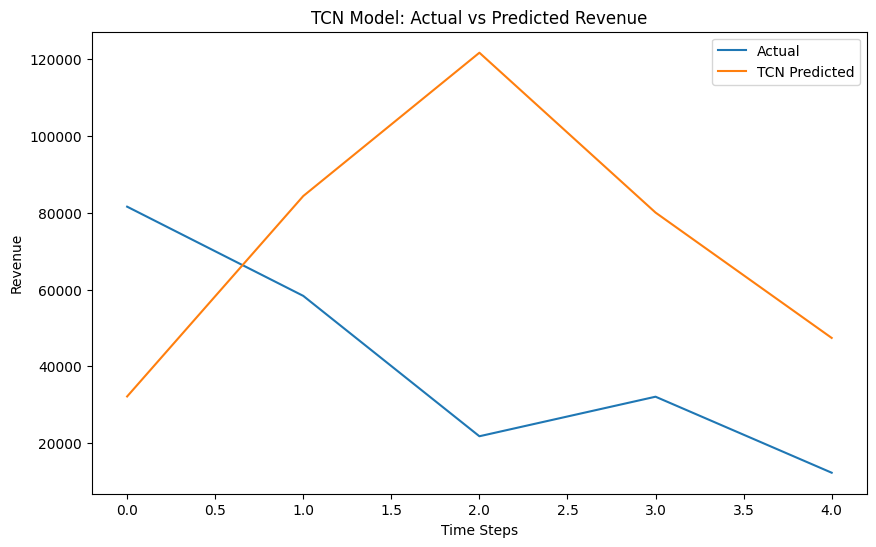

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tcn import TCN
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is already loaded from a previous cell and contains a 'Revenue' column
# If not, you would need to load it here:
# df = pd.read_csv("/content/drive/MyDrive/Sales_Data.csv")

# Prepare the data
values = df['Revenue'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(values)

# Define sequence length
seq_length = 12

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, seq_length)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build TCN model
inputs = Input(shape=(seq_length, 1))
x = TCN(nb_filters=64, kernel_size=3, dilations=[1, 2, 4, 8])(inputs)
outputs = Dense(1)(x)
tcn_model = Model(inputs, outputs)

# Compile model
tcn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
tcn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
y_pred = tcn_model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"TCN Model Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='TCN Predicted')
plt.title('TCN Model: Actual vs Predicted Revenue')
plt.xlabel('Time Steps')
plt.ylabel('Revenue')
plt.legend()
plt.show()